### Individual ACS Data

[Documentation](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2015-2019.pdf)

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from data_pipeline import fetch_census_data

In [3]:
#fetch_census_data.acs5_individual(force_api_call=True)

###### Importing Data

In [4]:
# loading individual acs data

acs_ind=pd.read_csv("data/acs5_individual.csv").drop(
                        ['state'], axis=1)
acs_ind.head(5)

,Unnamed: 0,internet_access,broadband,family_income,hh_income,poverty,race,hispanic,pop_65,weight,employment,work_available,education,citizenship,public use microdata area
0,0,1,1,-60000,1000,8,1,1,0,47,1,5,16,4,3520
1,1,1,1,-60000,96000,501,2,1,0,29,1,5,22,1,3501
2,2,1,1,366000,366000,501,1,1,0,15,1,5,21,1,3420
3,3,1,1,366000,366000,501,6,1,0,13,1,5,21,1,3420
4,4,1,1,366000,366000,501,9,1,0,14,0,0,8,1,3420


##### Recoding Variables

Education

In [5]:
acs_ind.education.unique()

array([16, 22, 21,  8,  3,  0, 13, 19, 14, 10, 20, 23,  6, 11,  9, 18, 15,
       12,  7,  5, 17,  1,  2,  4, 24])

In [6]:
# collapse education to 1,2,3 (<=high school, some college, >=bachelors)

acs_ind.loc[(acs_ind.education <= 17),'education']=1
acs_ind.loc[(acs_ind.education == 18),'education']=2
acs_ind.loc[(acs_ind.education == 19),'education']=2
acs_ind.loc[(acs_ind.education == 20),'education']=2
acs_ind.loc[(acs_ind.education >= 21),'education']=3

In [7]:
acs_ind.education.unique()

array([1, 3, 2])

Citizenship/Foreign-born

In [8]:
acs_ind.citizenship.unique()

array([4, 1, 5, 2, 3])

In [9]:
# 0 = born in the US or born to American parents 
# 1 = born outside the US
# Born in the U.S.
# Born in Puerto Rico, Guam, the U.S. Virgin Islands, or the Northern Marianas
# Born abroad of American parent(s)
# U.S. citizen by naturalization
# Not a citizen of the U.S.

acs_ind.loc[(acs_ind.citizenship >= 2),'citizenship']=0

In [10]:
acs_ind.citizenship.unique()

array([0, 1])

Employment

In [11]:
acs_ind.employment.unique()

array([1, 0, 6, 3, 2, 4])

In [12]:
# 0 = unemployed 
# 1 = employed 
# 2 = other 

acs_ind.loc[(acs_ind.employment == 0),'employment']=2
acs_ind.loc[(acs_ind.employment == 1),'employment']=1
acs_ind.loc[(acs_ind.employment == 2),'employment']=1
acs_ind.loc[(acs_ind.employment == 3),'employment']=0
acs_ind.loc[(acs_ind.employment == 4),'employment']=1
acs_ind.loc[(acs_ind.employment == 5),'employment']=1
acs_ind.loc[(acs_ind.employment == 6),'employment']=2

In [13]:
acs_ind.employment.unique()

array([1, 2, 0])

In [14]:
acs_ind.work_available.unique()

array([5, 0, 1, 3, 2, 4])

In [15]:
acs_ind = acs_ind[acs_ind['work_available'] < 5]

In [16]:
# 0 = not available for work
# 1 = available  

acs_ind.loc[(acs_ind.work_available == 0),'work_available']=0
acs_ind.loc[(acs_ind.work_available >= 2),'work_available']=1

In [17]:
acs_ind.work_available.unique()

array([0, 1])

In [18]:
#if acs_ind[(acs_ind['employment'] == 0)] and acs_ind[(acs_ind['work_available'] == 1)]:

In [19]:
#acs_ind["unemployed"].unique()

Population 65+

In [20]:
acs_ind.pop_65.unique()

array([ 0,  1, -1,  2])

In [21]:
acs_ind = acs_ind[acs_ind['pop_65'] >= 0]

In [22]:
# 0 No person 65 and over
# 1 person 65 and over
# 2 or more persons 65 and over


acs_ind.loc[(acs_ind.pop_65 >= 1),'pop_65']=1

In [23]:
acs_ind.pop_65.unique()

array([0, 1])

Internet Access

In [24]:
acs_ind.internet_access.unique()

array([1, 3, 2])

In [25]:
# need to remove the responses with "0" because it means no response

acs_ind = acs_ind[acs_ind['internet_access'] >0]

In [26]:
# recoding internet access
# 0 = no access
# 1 = access 

acs_ind.loc[(acs_ind.internet_access == 2),'internet_access']=1
acs_ind.loc[(acs_ind.internet_access == 3),'internet_access']=0

Hispanic

In [27]:
# recoding hispanic
# 0 = not hispanic
# 1 = hispanic

acs_ind.loc[(acs_ind.hispanic == 1),'hispanic']=0
acs_ind.loc[(acs_ind.hispanic > 1),'hispanic']=1

In [28]:
acs_ind.hispanic.unique()

array([0, 1])

non-Hispanic White, Black, Asian Races

In [29]:
black_df = acs_ind[["Unnamed: 0","race","hispanic"]].rename(columns={
                        "race": "black"})

In [30]:
black_df.loc[(black_df.black < 2),'black']=0
black_df.loc[(black_df.black > 2),'black']=0
black_df.loc[(black_df.black == 2),'black']=1

In [31]:
black_df.black.unique()

array([0, 1])

In [32]:
black_df["nh_black"]=black_df['hispanic']+black_df['black']

In [33]:
black_df.loc[(black_df.nh_black == 0),'nh_black']=0
black_df.loc[(black_df.nh_black == 1),'nh_black']=1
black_df.loc[(black_df.nh_black == 2),'nh_black']=0

In [34]:
black_df.nh_black.unique()

array([0, 1])

In [35]:
black_df=black_df.drop(['hispanic'], axis=1)

In [36]:
white_df = acs_ind[["Unnamed: 0","race", "hispanic"]].rename(columns={
                        "race": "white"})

In [37]:
white_df.loc[(white_df.white < 1),'white']=0
white_df.loc[(white_df.white > 1),'white']=0
white_df.loc[(white_df.white == 1),'white']=1

In [38]:
white_df.white.unique()

array([0, 1])

In [39]:
white_df["nh_white"]=white_df['hispanic']+white_df['white']

In [40]:
white_df.loc[(white_df.nh_white == 0),'nh_white']=0
white_df.loc[(white_df.nh_white == 1),'nh_white']=1
white_df.loc[(white_df.nh_white == 2),'nh_white']=0

In [41]:
white_df=white_df.drop(['hispanic'], axis=1)

In [42]:
asian_df = acs_ind[["Unnamed: 0","race", "hispanic"]].rename(columns={
                        "race": "asian"})

In [43]:
asian_df.loc[(asian_df.asian < 6),'asian']=0
asian_df.loc[(asian_df.asian > 6),'asian']=0
asian_df.loc[(asian_df.asian == 6),'asian']=1

In [44]:
asian_df.asian.unique()

array([0, 1])

In [45]:
asian_df["nh_asian"]=asian_df['hispanic']+asian_df['asian']

In [46]:
asian_df.loc[(asian_df.nh_asian == 0),'nh_asian']=0
asian_df.loc[(asian_df.nh_asian == 1),'nh_asian']=1
asian_df.loc[(asian_df.nh_asian == 2),'nh_asian']=0

In [47]:
asian_df=asian_df.drop(['hispanic'], axis=1)

In [48]:
acs_ind=acs_ind.merge(white_df, on='Unnamed: 0'
                           ).merge(black_df, on='Unnamed: 0').merge(asian_df, on='Unnamed: 0')

Household & Family Income

In [49]:
acs_ind.family_income.unique()

array([ 366000,  385000,  103500, ...,  854000,  749000, 1033000])

In [50]:
acs_ind.family_income.min()

-60000

In [51]:
acs_ind.hh_income.unique()

array([ 366000,  385000,  103500, ...,  854000,  749000, 1033000])

In [52]:
acs_ind.hh_income.min()

-7250

In [53]:
# keeping incomes above 0 

acs_ind = acs_ind[acs_ind['hh_income'] >0]
acs_ind = acs_ind[acs_ind['family_income'] >0]

In [54]:
# log incomes

acs_ind["log_family_income"]=acs_ind["family_income"].apply(lambda x: np.log(x))
acs_ind["log_hh_income"]=acs_ind["hh_income"].apply(lambda x: np.log(x))

In [55]:
acs_ind.log_family_income.unique()

array([12.81038861, 12.86099861, 11.54732689, ..., 13.65768647,
       13.52649426, 13.84797775])

In [56]:
acs_ind.log_family_income.min()

1.3862943611198906

In [57]:
acs_ind.log_hh_income.unique()

array([12.81038861, 12.86099861, 11.54732689, ..., 13.65768647,
       13.52649426, 13.84797775])

In [58]:
acs_ind.log_hh_income.min()

1.3862943611198906

In [59]:
acs_ind.head(10)

,Unnamed: 0,internet_access,broadband,family_income,hh_income,poverty,race,hispanic,pop_65,weight,...,citizenship,public use microdata area,white,nh_white,black,nh_black,asian,nh_asian,log_family_income,log_hh_income
0,4,1,1,366000,366000,501,9,0,0,14,...,1,3420,0,0,0,0,0,0,12.810389,12.810389
1,5,1,1,366000,366000,501,9,0,0,12,...,1,3420,0,0,0,0,0,0,12.810389,12.810389
2,7,1,1,385000,385000,501,1,0,0,16,...,0,3502,1,1,0,0,0,0,12.860999,12.860999
3,8,1,1,385000,385000,501,1,0,0,17,...,1,3502,1,1,0,0,0,0,12.860999,12.860999
4,22,1,1,103500,103500,501,1,1,0,11,...,0,3529,1,0,0,1,0,1,11.547327,11.547327
5,29,1,1,58000,58000,366,1,1,0,15,...,0,3420,1,0,0,1,0,1,10.968198,10.968198
6,36,0,0,49600,49600,346,2,0,1,11,...,1,3523,0,0,1,1,0,0,10.811746,10.811746
7,40,1,1,130000,130000,501,1,0,0,10,...,1,3530,1,1,0,0,0,0,11.775290,11.775290
8,41,1,1,130000,130000,501,1,0,0,10,...,1,3530,1,1,0,0,0,0,11.775290,11.775290
9,61,1,1,66600,66600,359,2,0,1,13,...,1,3521,0,0,1,1,0,0,11.106460,11.106460


#### Visualizations

<AxesSubplot:xlabel='internet_access', ylabel='log_hh_income'>

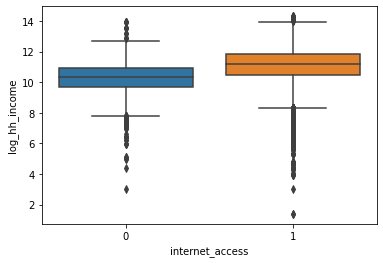

In [60]:
sns.boxplot(x="internet_access", y="log_hh_income", data=acs_ind)

<AxesSubplot:xlabel='internet_access', ylabel='log_family_income'>

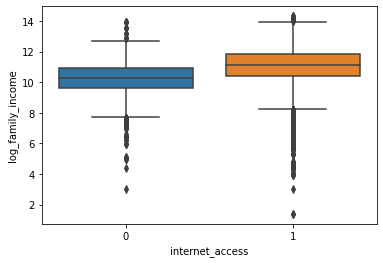

In [61]:
sns.boxplot(x="internet_access", y="log_family_income", data=acs_ind)

In [62]:
count_no_int = len(acs_ind[acs_ind['internet_access']==0])
count_int = len(acs_ind[acs_ind['internet_access']==1])
pct_of_int = count_int/(count_no_int+count_int)
print("percentage with internet access is", pct_of_int*100)
pct_of_no_int = count_no_int/(count_no_int+count_int)
print("percentage with no internet access", pct_of_no_int*100)

percentage with internet access is 92.43053337591823
percentage with no internet access 7.5694666240817625


### List of variables that may impact internet access

- household income
- family income
- race
- hispanic
- poverty to income ratio 

### Correlation 

<AxesSubplot:>

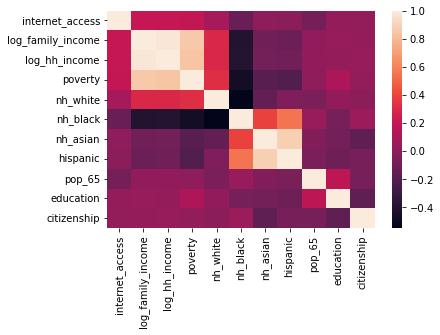

In [63]:
sns.heatmap(
    acs_ind[['internet_access','log_family_income','log_hh_income','poverty','nh_white','nh_black','nh_asian','hispanic', 'pop_65','education','citizenship']]
    .corr()
)

#### Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit

#### Full Model with All Variables

In [87]:
# recode citizenship foreign born citizen, born citizen, citizen abroad
# what other methods could be run to measure impact of variables
# what are possible explanations 
# differences in p values multiple logit vs individual logit 

formula=("internet_access ~ log_hh_income + hispanic + nh_asian + nh_black + education + pop_65")

model=logit(formula=formula, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.242595
         Iterations 7


In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25041
Method:                           MLE   Df Model:                            6
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                 0.09522
Time:                        10:02:57   Log-Likelihood:                -6076.5
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                3.805e-273
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.3621      0.239     -9.873      0.000      -2.831      -1.893
log_hh_income     0.4826      0.020     23.996      0.000       0.443       0.522
hispanic         -0.0734      0.166     -0.442      0.658      -0.399       0.252
nh_asian          0.3482      0.157      2.222      0.026       0.041       0.655
nh_black         -0.8073      0.073    -11.028      0.000      -0.951      -0.664
education         0.3006      0.062      4.834      0.000       0.179       0.423
pop_65           -0.8957      0.060    -14.881      0.000      -1.014      -0.778
=================================================================================
"""

We took out one of the race variables (Asian) because (together, all four race variales are perfectly multicollinear) and that we should probably drop log_family_income and poverty because they’re highly correlated with log_hh_income and would complicate the interpretation and reduce precision without explaining much more of the variation.

#### Income Models

In [67]:
formulaA=("internet_access ~ log_hh_income")

modelA=logit(formula=formulaA, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.250821
         Iterations 7


In [68]:
modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                 0.06454
Time:                        09:46:12   Log-Likelihood:                -6282.6
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                1.527e-190
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.2352      0.190    -17.008      0.000      -3.608      -2.862
log_hh_income     0.5358      0.018     29.560      0.000       0.500       0.571
=================================================================================
"""

In [69]:
formulaB=("internet_access ~ log_family_income")

modelB=logit(formula=formulaB, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.251460
         Iterations 7


In [70]:
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                 0.06216
Time:                        09:46:12   Log-Likelihood:                -6298.6
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                1.375e-183
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0224      0.186    -16.227      0.000      -3.387      -2.657
log_family_income     0.5183      0.018     29.067      0.000       0.483       0.553
=====================================================================================
"""

In [71]:
formulaC=("internet_access ~ poverty")

modelC=logit(formula=formulaC, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.248613
         Iterations 7


In [72]:
modelC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                 0.07278
Time:                        09:46:12   Log-Likelihood:                -6227.2
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                1.358e-214
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4457      0.038     38.075      0.000       1.371       1.520
poverty        0.0049      0.000     27.892      0.000       0.005       0.005
==============================================================================
"""

#### Race & Ethnicity Models 

In [73]:
formula0=("internet_access ~ hispanic")

model0=logit(formula=formula0, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.268104
         Iterations 6


In [74]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:               8.165e-05
Time:                        09:46:12   Log-Likelihood:                -6715.5
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                    0.2950
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5204      0.030     85.178      0.000       2.462       2.578
hispanic      -0.0526      0.050     -1.050      0.294      -0.151       0.046
==============================================================================
"""

In [75]:
formula1=("internet_access ~ nh_white")

model1=logit(formula=formula1, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.264050
         Iterations 7


In [76]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                 0.01520
Time:                        09:46:12   Log-Likelihood:                -6613.9
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                 2.554e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2398      0.029     78.554      0.000       2.184       2.296
nh_white       0.7246      0.053     13.746      0.000       0.621       0.828
==============================================================================
"""

In [77]:
formula2=("internet_access ~ nh_black")

model2=logit(formula=formula2, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.258869
         Iterations 7


In [78]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                 0.03453
Time:                        09:46:12   Log-Likelihood:                -6484.1
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                7.337e-103
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3510      0.055     60.735      0.000       3.243       3.459
nh_black      -1.1941      0.061    -19.470      0.000      -1.314      -1.074
==============================================================================
"""

In [79]:
formula3=("internet_access ~ nh_asian")

model3=logit(formula=formula3, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.268052
         Iterations 6


In [80]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                25048
Model:                          Logit   Df Residuals:                    25046
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:               0.0002784
Time:                        09:46:12   Log-Likelihood:                -6714.2
converged:                       True   LL-Null:                       -6716.0
Covariance Type:            nonrobust   LLR p-value:                   0.05316
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4660      0.030     81.844      0.000       2.407       2.525
nh_asian       0.0953      0.049      1.927      0.054      -0.002       0.192
==============================================================================
"""